In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


In [26]:
df=pd.read_csv('target_enhance.csv', low_memory=False)

In [27]:
mode_val=df['source'].mode()[0]
df['source']=df['source'].fillna(mode_val)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   unsubs_from      308911 non-null  object
 1   unsubs_date      308911 non-null  object
 2   revenue          308911 non-null  int64 
 3   subs_date        308911 non-null  object
 4   source           308911 non-null  object
 5   country          308911 non-null  object
 6   operator         308911 non-null  object
 7   profile_status   308911 non-null  object
 8   status           308911 non-null  int64 
 9   service_price    308911 non-null  int64 
 10  publisher        308911 non-null  object
 11  adnet            308911 non-null  object
 12  service          308911 non-null  object
 13  success_billing  308911 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 33.0+ MB


/home/abbas/DATA_SCIENCE_PROJECT/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abbas/DATA_SCIENCE_PROJECT/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abbas/DATA_SCIENCE_PROJECT/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abbas/DATA_SCIENCE_PROJECT/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416:

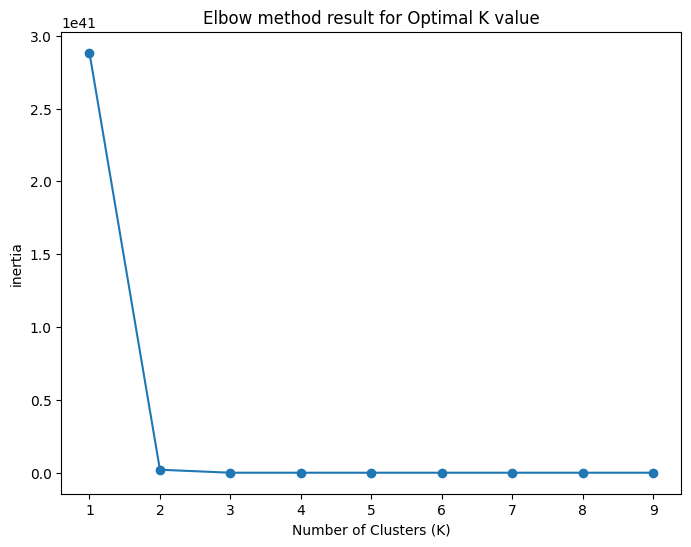

In [29]:
#it is important to use ELBOW method inorder to get the most optimal k (number of desires clusters)value
#for the following seletected features

selected_features=['revenue', 'status', 'service_price', 'success_billing']
X_features=df[selected_features]

#setting a range for differnet kvalues for the features
k_values=range(1,10)
inertia_values=[]
for k in k_values:
    kmeans=KMeans(n_clusters= k, random_state=42)
    kmeans.fit(X_features)
    inertia_values.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow method result for Optimal K value')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('inertia')
plt.show()



In [30]:
#The above elbow method shows the most optimal K-value for the selected features is 2.

/home/abbas/DATA_SCIENCE_PROJECT/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


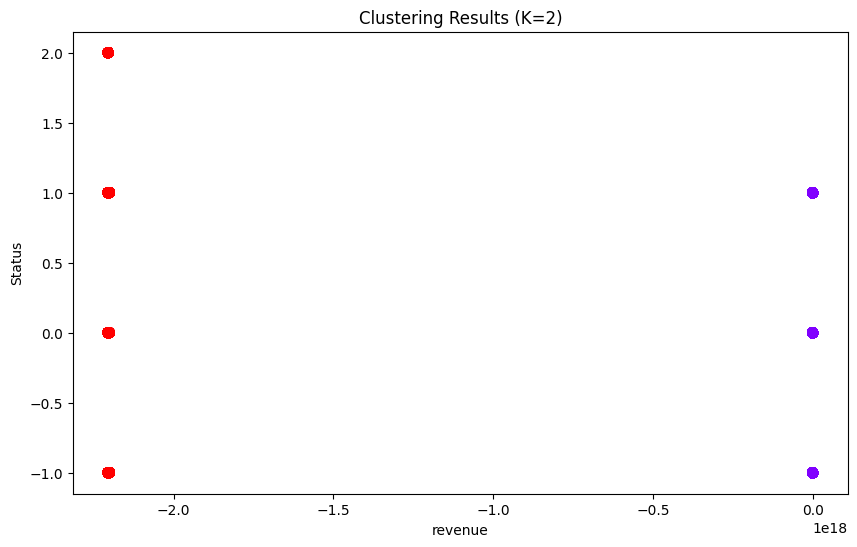

Metrics Evaluation Method of  Inertia: 
 2.059497010801236e+39


In [33]:
def kmeans_clustering(df, selected_features, n_clusters=2, plot=True):
   
    X = df[selected_features]

    # K-means Implementation
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)

    # Print Inertia
    

    # Scatter plot
    if plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['service_price'], df['status'], c=df['cluster'], cmap='rainbow', s=50)
        plt.xlabel('revenue')
        plt.ylabel('Status')
        plt.title(f'Clustering Results (K={n_clusters})')
        plt.show()
        
    print("Metrics Evaluation Method of  Inertia: \n", kmeans.inertia_)

selected_features = ['revenue', 'status', 'service_price', 'success_billing']
kmeans_clustering(df, selected_features, n_clusters=2)


In [31]:
#So the above K-Means clustering shows the two clusters colored with red and purple. The center of the clustering are the status and revenue